In [1]:
import os

mbtr_rbf_path = os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/03.01_optim_HOMO_mbtr_rbf_10_steps"
sc_dp_path = os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/02.01_optim_HOMO_shg_count_dp_10_steps"
evomol_path = os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/01.01_EvoMol_from_methane_optim_HOMO_rdkit_nocache"


output_figures = os.environ["FIGURES"] + "/07_BBO/03_bbo_optim/poster/best_sol/"

os.makedirs(output_figures, exist_ok=True)

In [2]:
from os.path import join
import csv
import numpy as np

def extract_all_scores_bbo_exp(root_path):
    
    all_solutions = []
    all_scores = []
    
    for i in range(1, 11):
        
        curr_run_dataset_path = join(root_path, str(i), "dataset.csv")
        with open(curr_run_dataset_path, "r") as f:
            reader = csv.reader(f)
            
            for i, row in enumerate(reader):
                if i>0:
                    all_solutions.append(row[1])
                    all_scores.append(float(row[2]))
                
    return all_solutions, all_scores


def extract_all_scores_evomol_exp(root_path):
    
    all_solutions = []
    all_scores = []
    
    for i in range(1, 11):
        
        curr_run_generated_path = join(root_path, str(i), "all_generated.csv")
        
        with open(curr_run_generated_path, "r") as f:
            
            reader = csv.reader(f)
            for i, row in enumerate(reader):
                
                if i > 0:
                    if row[5] == "True":
                        
                        all_solutions.append(row[1])
                        all_scores.append(float(row[3]))
    return all_solutions, all_scores


In [3]:


def compute_smiles_homo_dict(solutions_list, scores_list):

    d = {}
    
    for i in range(len(solutions_list)):
        
        curr_solutions = solutions_list[i]
        curr_scores = scores_list[i]
        
        for j in range(len(curr_solutions)):
            
            curr_sol, curr_score = curr_solutions[j], curr_scores[j]
            
            if curr_sol not in d:
                d[curr_sol] = float(curr_score)
            elif d[curr_sol] > curr_score:
                d[curr_sol] = float(curr_score)
                
    return d

def compute_unique_pairs_solutions_scores(solutions, d):
    
    unique_solutions = []
    unique_scores = []
    
    for smi in np.unique(solutions):
        unique_solutions.append(smi)

        unique_scores.append(d[smi])
        
    return unique_solutions, unique_scores
    


def compute_smiles_homo_dict_mean_std(solutions_list, scores_list):

    d = {}
    
    for i in range(len(solutions_list)):
        
        curr_solutions = solutions_list[i]
        curr_scores = scores_list[i]
        
        for j in range(len(curr_solutions)):
            
            curr_sol, curr_score = curr_solutions[j], curr_scores[j]
            
            if curr_sol not in d:
                d[curr_sol] = [float(curr_score)]
            else:
                d[curr_sol].append(curr_score)
    
    d_mean = {}
    d_std = {}
    d_number = {}
    
    for smi, values in d.items():
        
        d_mean[smi] = np.array(values).mean()
        d_std[smi] = np.array(values).std()
        d_number[smi] = len(values)
    
    
    return d_mean, d_std, d_number


def compute_unique_pairs_solutions_scores_mean_std(solutions, d_mean, d_std, d_number):
    
    unique_solutions = []
    unique_mean = []
    unique_std = []
    unique_number = []
    
    for smi in np.unique(solutions):
        
        unique_solutions.append(smi)
        unique_mean.append(d_mean[smi])
        unique_std.append(d_std[smi])
        unique_number.append(d_number[smi])
        
    return unique_solutions, unique_mean, unique_std, unique_number

In [4]:
# # Extracting values from data
# solutions_mbtr_rbf, scores_mbtr_rbf = extract_all_scores_bbo_exp(mbtr_rbf_path)
# solutions_sc_dp, scores_sc_dp = extract_all_scores_bbo_exp(sc_dp_path)
# solutions_evomol, scores_evomol = extract_all_scores_evomol_exp(evomol_path)

# # Computing the dictionary of unique pairs (solution, homo value)
# d = compute_smiles_homo_dict([solutions_mbtr_rbf, solutions_sc_dp, solutions_evomol],
#                              [scores_mbtr_rbf, scores_sc_dp, scores_evomol])

# # Computing lists of unique pairs (solution, score)
# unique_sol_mbtr_rbf, unique_scores_mbtr_rbf = compute_unique_pairs_solutions_scores(solutions_mbtr_rbf, d)
# unique_sol_sc_dp, unique_scores_sc_dp = compute_unique_pairs_solutions_scores(solutions_sc_dp, d)
# unique_sol_evomol, unique_scores_evomol = compute_unique_pairs_solutions_scores(solutions_evomol, d)


In [5]:
# Extracting values from data
solutions_mbtr_rbf, scores_mbtr_rbf = extract_all_scores_bbo_exp(mbtr_rbf_path)
solutions_sc_dp, scores_sc_dp = extract_all_scores_bbo_exp(sc_dp_path)
solutions_evomol, scores_evomol = extract_all_scores_evomol_exp(evomol_path)

# Computing the dictionary of unique pairs (solution, homo value)
d_mean, d_std, d_number = compute_smiles_homo_dict_mean_std([solutions_mbtr_rbf, solutions_sc_dp, solutions_evomol],
                                                            [scores_mbtr_rbf, scores_sc_dp, scores_evomol])

# Computing lists of unique pairs (solution, score)
mbtr_rbf_sol, mbtr_rbf_mean, mbtr_rbf_std, mbtr_rbf_number = compute_unique_pairs_solutions_scores_mean_std(solutions_mbtr_rbf, d_mean, d_std, d_number)
sc_dp_sol, sc_dp_mean, sc_dp_std, sc_dp_number = compute_unique_pairs_solutions_scores_mean_std(solutions_sc_dp, d_mean, d_std, d_number)
evomol_sol, evomol_mean, evomol_std, evomol_number = compute_unique_pairs_solutions_scores_mean_std(solutions_evomol, d_mean, d_std, d_number)

all_sol, all_mean, all_std, all_number = compute_unique_pairs_solutions_scores_mean_std(solutions_mbtr_rbf + solutions_sc_dp + solutions_evomol, 
                                                                                        d_mean, d_std, d_number)

In [6]:
import numpy as np
from rdkit.Chem.Draw import MolsToGridImage, DrawingOptions
from rdkit.Chem import MolFromSmiles

# def plot_best(solutions, scores, n, name, exp):
    
#     solutions = np.array(solutions)
#     scores = np.array(scores)
    
#     best_idx = np.argsort(scores)[::-1][:n]
    
#     selected_smiles = solutions[best_idx]
#     selected_scores = list(scores[best_idx])
    
#     img = MolsToGridImage(mols=[MolFromSmiles(smi) for smi in selected_smiles],
#                           molsPerRow=5, subImgSize=(200, 200), 
#                           legends=["HOMO : " + "{:.2f}".format((score)) + " eV" for score in selected_scores],
#                           returnPNG=False)
    
#     with open(join(output_figures, "best_" + str(n) + "_" + name + "_" + exp + ".png"), 'wb') as f:
#         img.save(f, "png")
    
#     return img
    
    
def plot_best_mean_std(solutions, mean, std, number, n, name, exp):
    
    solutions = np.array(solutions)
    mean = np.array(mean)
    std = np.array(std)
    number = np.array(number)
    
    best_idx = np.argsort(mean)[::-1][:n]
    
    selected_smiles = solutions[best_idx]
    selected_mean = list(mean[best_idx])
    selected_std = list(std[best_idx])
    selected_number = list(number[best_idx])
    
    legends = ["{:.2f}".format((selected_mean[i])) + " (" + "{:.2f}".format((selected_std[i])) +")" + " eV #" + str(selected_number[i]) for i in range(len(selected_smiles))]
    
    img = MolsToGridImage(mols=[MolFromSmiles(smi) for smi in selected_smiles],
                          molsPerRow=5, subImgSize=(200, 200), 
                          legends=legends,
                          returnPNG=False)
    
    with open(join(output_figures, "best_" + str(n) + "_" + name + "_" + exp + ".png"), 'wb') as f:
        img.save(f, "png")
    
    return img
    

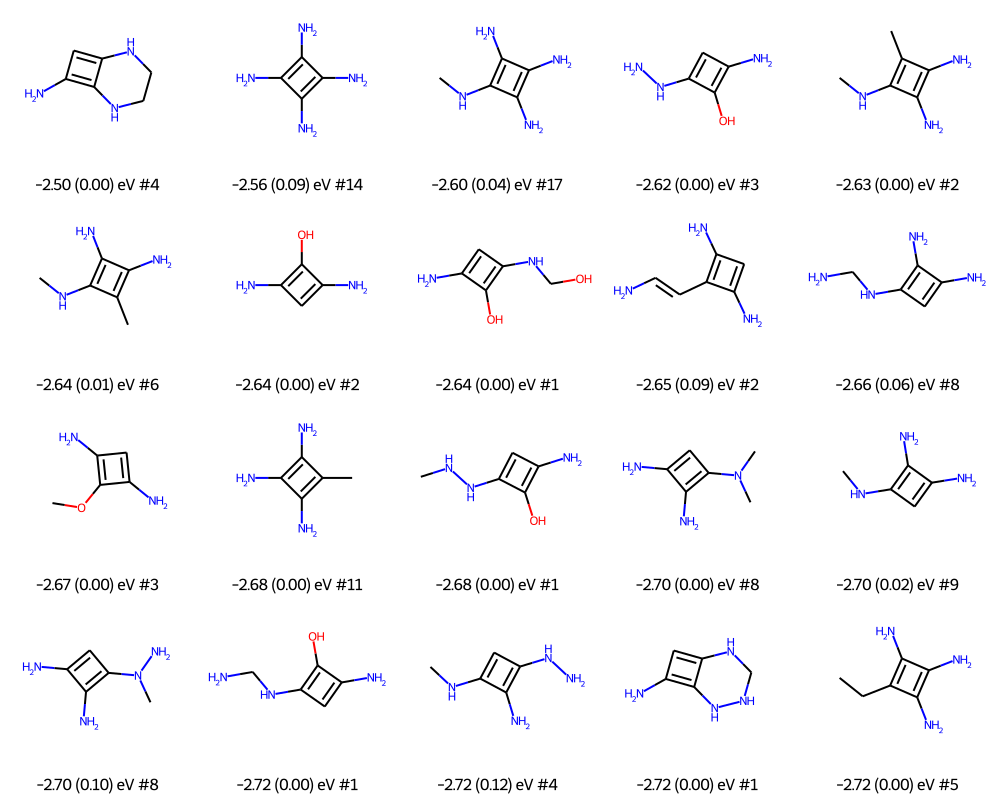

In [7]:
plot_best_mean_std(mbtr_rbf_sol, mbtr_rbf_mean, mbtr_rbf_std, mbtr_rbf_number, 20, 
                   name="BBO_MBTR_RBF", exp="deterministic_values")

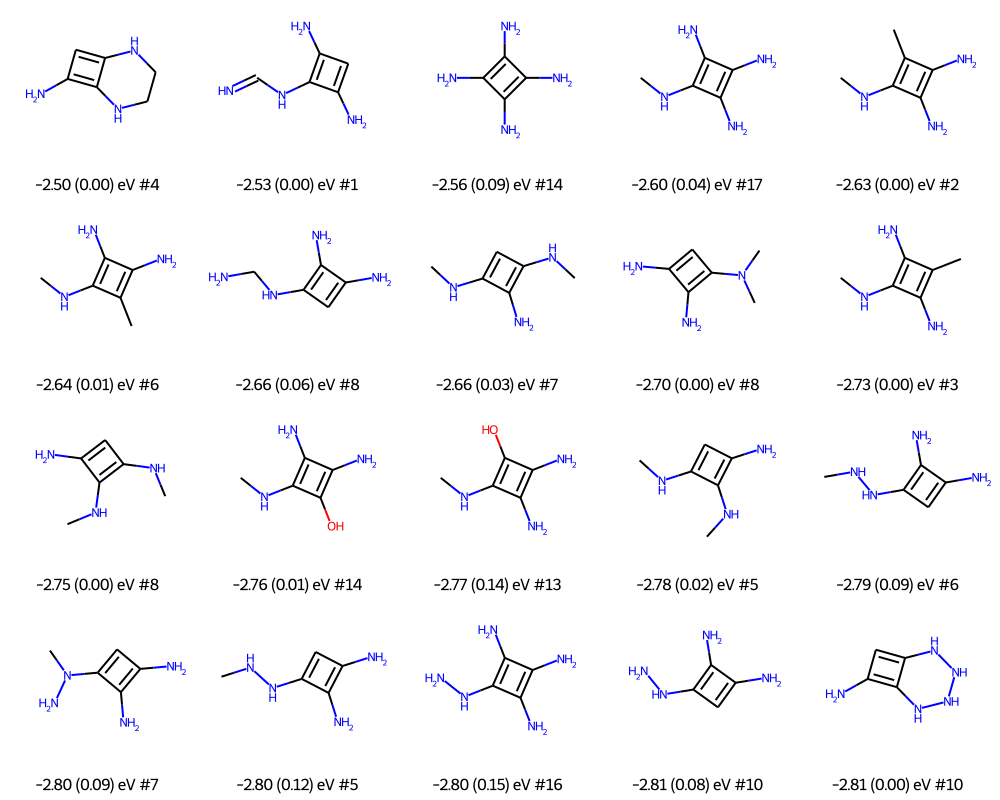

In [8]:
plot_best_mean_std(sc_dp_sol, sc_dp_mean, sc_dp_std, sc_dp_number, 20, 
                   name="BBO_SC_DP", exp="deterministic_values")

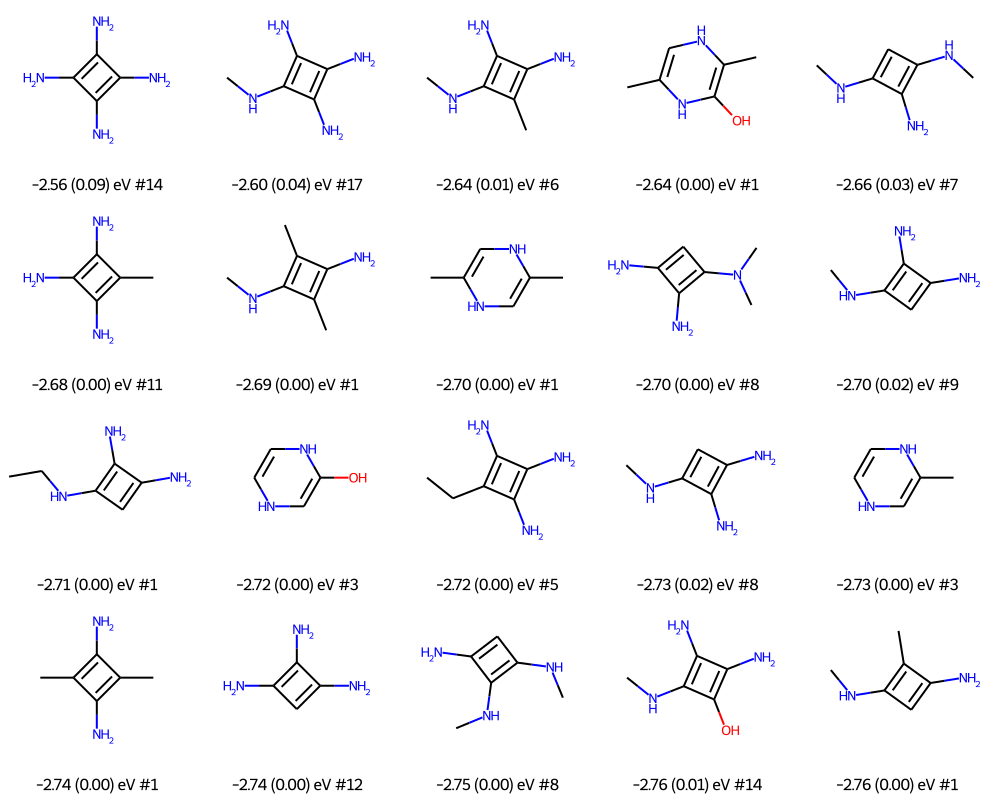

In [9]:
plot_best_mean_std(evomol_sol, evomol_mean, evomol_std, evomol_number, 20, 
                   name="EvoMol", exp="deterministic_values")

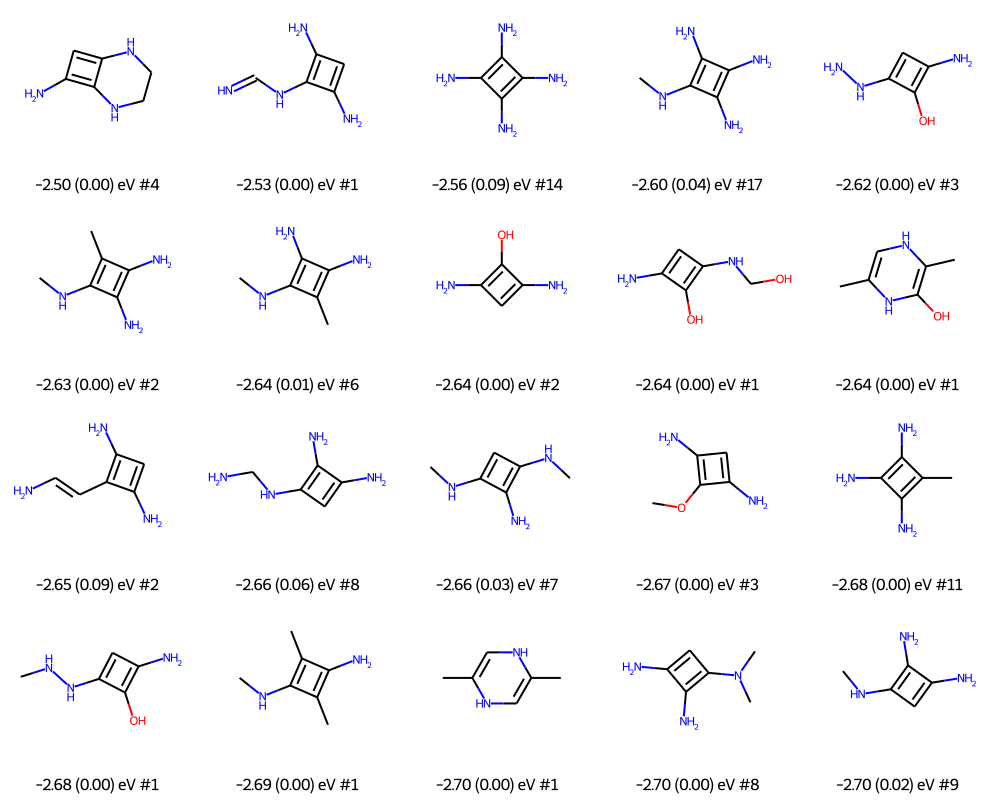

In [10]:
plot_best_mean_std(all_sol, all_mean, all_std, all_number, 20, name="All", exp="deterministic_values")